In [2]:
from cobra.io import read_sbml_model
from cobra.io import write_sbml_model
from cobra import Reaction, Metabolite
import pandas as pd

In [ ]:
model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')

**Checking max 5-HTP production and respective growth rate if objective value is changed to the 5-HTP export reaction**

In [ ]:
# Finding the flux of the phhA reaction
with model:
    print(model.reactions.phhA)
    model.objective = model.reactions.phhA
    solution = model.optimize()
    max_5HTP_production = solution.objective_value
    print("HTP flux", max_5HTP_production)
    print("Biomass flux", solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)

**We can see here, that when we have optimal flux towards 5-HTP production, then there will be no flux towards biomass production, thus no growth of the cell.
Let's try and optimize for both 5-HTP and biomass production**

In [ ]:
# Getting the flux towards 5-HTP and biomass respectively, when optimized for both reactions
with model:
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    print("5-HTP flux", solution.objective_value)
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    print("Biomass flux", solution.objective_value)

We can see here that the flux towards biomass and 5-HTP production are both half of their previous optimal flux, which make sense now that they share the flux

**Let's now observe how the growth rate changes with increasing 5-HTP export flux**

In [33]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [34]:
ppp_5HTP = production_envelope(model,
                    reactions=[model.reactions.phhA],
                    objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)

In [35]:
ppp_5HTP

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,phhA
0,EX_glc__D_e,0.0,0.0,NaN,0.876997,1.161751e+01,NaN,0.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.831248,1.101147e+01,NaN,0.225221
2,EX_glc__D_e,0.0,0.0,NaN,0.785499,1.040543e+01,NaN,0.450443
3,EX_glc__D_e,0.0,0.0,NaN,0.739749,9.799397e+00,NaN,0.675664
4,EX_glc__D_e,0.0,0.0,NaN,0.694000,9.193359e+00,NaN,0.900885
5,EX_glc__D_e,0.0,0.0,NaN,0.647766,8.580901e+00,NaN,1.126106
6,EX_glc__D_e,0.0,0.0,NaN,0.601497,7.967979e+00,NaN,1.351328
7,EX_glc__D_e,0.0,0.0,NaN,0.555228,7.355058e+00,NaN,1.576549
8,EX_glc__D_e,0.0,0.0,NaN,0.508959,6.742136e+00,NaN,1.801770
9,EX_glc__D_e,0.0,0.0,NaN,0.462690,6.129215e+00,NaN,2.026992


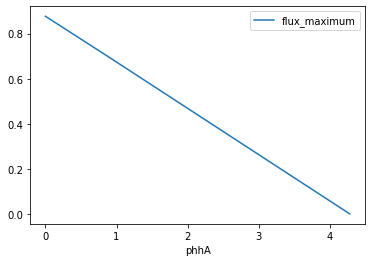

In [36]:
ppp_5HTP.plot(x='phhA', y='flux_maximum')

**Optmizing 5-HTP production and growth rate**

In [37]:
from cobra.flux_analysis import flux_variability_analysis

In [38]:
hydroxy_trp_flux_analysis = flux_variability_analysis(model, model.reactions.phhA, fraction_of_optimum = 0.5)
print(hydroxy_trp_flux_analysis)

      minimum   maximum
phhA      0.0  2.144746


In [39]:
hydroxy_trp_flux_analysis = float(flux_variability_analysis(model, model.reactions.phhA, fraction_of_optimum = 0.5)["maximum"][0])
print(hydroxy_trp_flux_analysis)

2.1447464147568795


Keeping growth rate at 50%, we get around 50% of maximum 5-HTP flux, which is the same result as when optimizing for both fluxes.

**Knocking out a single gene and setting the objective value of the model for 5-HTP export flux**

Only non-zero biomass production flux knock-outs are selected

In [40]:
for gene in model.genes:
    with model:
        gene.knock_out()
        model.objective = model.reactions.phhA
        solution = model.optimize()
        if solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M > 0:
            print ('5-HTP export flux:', solution.fluxes.tph, 'Gene ID:', gene.id, 'Biomass production:', solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)

No solutions displayed, no single knock-outs and optmization to maximum 5-HTP production yields positive growth rate

**Knocking out a single gene, running optimisation for max biomass production flux and observing 5-HTP export flux**

Only non-zero 5-HTP export flux knock-outs are selected

In [41]:
knock_out_list = pd.DataFrame(columns=['Gene ID', '5-HTP export flux', 'Biomass production flux'])
for gene in model.genes:
    with model:
        gene.knock_out()
        solution = model.optimize()
        if solution.fluxes.phhA > 0:
            knock_out_list = knock_out_list.append({ 'Gene ID': gene.id, '5-HTP export flux': solution.fluxes.phhA, 'Biomass production flux': model.optimize().objective_value}, ignore_index=True)

In [42]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(knock_out_list)

Empty DataFrame
Columns: [Gene ID, 5-HTP export flux, Biomass production flux]
Index: []


<ipython-input-42-f4d78eb1eacc>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


No solutions, no single knock-outs give rise to positive htp flux with maximum growth rate

**Check whether change of carbon source will influence the growth rate at maximum 5-HTP flux**

In [43]:
#create list to store the reactions' IDs
carbon_uptake = list()

#go through all metabolites in the model that have carbon in their chem.structure
for metabolite in model.metabolites:
    if 'C' in metabolite.elements:
        #find metabolites that are external
        if metabolite.id[-1] == 'e':
            reactions = metabolite.reactions
            #pick reactions which exchange the metabolite with the external environment
            for element in reactions:
                if str(element.id[:2]) == 'EX':
                    carbon_uptake.append(element.id)

In [44]:
for reaction in carbon_uptake:
    print(reaction, "with the name: ", model.reactions.get_by_id(reaction).name)


EX_co2_e with the name:  CO2 exchange
EX_akg_e with the name:  2-Oxoglutarate exchange
EX_gsn_e with the name:  Guanosine exchange
EX_34dhpac_e with the name:  3,4-Dihydroxyphenylacetaldehyde exchange
EX_anhgm_e with the name:  N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramic acid exchange
EX_dms_e with the name:  Dimethyl sulfide exchange
EX_galctn__L_e with the name:  L-Galactonate exchange
EX_btn_e with the name:  Biotin exchange
EX_ocdcea_e with the name:  Octadecenoate (n-C18:1) exchange
EX_acmum_e with the name:  N-Acetylmuramate exchange
EX_adocbl_e with the name:  Adenosylcobalamin exchange
EX_novbcn_e with the name:  Novobiocin exchange
EX_feenter_e with the name:  Fe-enterobactin exchange
EX_arbtn_e with the name:  Aerobactin minus Fe3 exchange
EX_gln__L_e with the name:  L-Glutamine exchange
EX_cpgn_un_e with the name:  Coprogen unloaded (no Fe(III)) exchange
EX_tre_e with the name:  Trehalose exchange
EX_alaala_e with the name:  D-Alanyl-D-alanine exchange
EX_idon__L_e with

In [45]:
model.medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}

In [46]:
medium = model.medium


#replace glucose with each exchange reaction from the possible carbon source reactions
for reaction in carbon_uptake:
    medium = model.medium
    with model:
        medium['EX_glc__D_e'] = 0
        medium[reaction] = 10
        model.medium = medium
        model.objective = model.reactions.phhA
        solution = model.optimize()
        max_5HTP_production = solution.objective_value
        if solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M > 0:
            print(solution.fluxes.BIOMASS_Ec_iML1515_core_75p37M)
            print(max_5HTP_production)

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/sit

No solutions, changing of medium does not influence the increase of growth rate at 5-HTP maximum flux production

**Again working under the assumption that the production of 5-HTP and biomass needs to be shared 50-50, we will try and go through the list of potential carbon sources to see which carbon source will increase the flux towards both 5-HTP and biomass production.**

In [49]:
# getting the max fluxes of 5-htp and biomass production on glucose
medium = model.medium
model.objective = {model.reactions.phhA: 0.5}
solution = model.optimize()
glucose_max_5htp = solution.objective_value
model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
solution = model.optimize()
glucose_max_biomass = solution.objective_value
count = 0

#replace glucose with each exchange reaction from the possible carbon source reactions
for reaction in carbon_uptake:
    # resetting the media after each change
    medium = model.medium
    with model:
        # setting the medium to the new carbon source
        medium['EX_glc__D_e'] = 0
        medium[reaction] = 10
        model.medium = medium
        # calculating max production of 5-htp and biomass
        model.objective = {model.reactions.phhA: 0.5}
        solution = model.optimize()
        max_5HTP_production = solution.objective_value
        model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
        solution = model.optimize()
        max_biomass_production = solution.objective_value
        # If the production is higher for both biomass and 5-htp production than using glucose as carbon source, then we print it
        if max_5HTP_production > glucose_max_5htp and max_biomass_production > glucose_max_biomass:
            count += 1
            print("optimal 5htp production using: ", model.reactions.get_by_id(reaction).name, "is ", max_5HTP_production)
            print("optimal biomass production using: ", model.reactions.get_by_id(reaction).name, "is ", max_biomass_production)
print("number of carbon sources which could improve 5-htp production: ", count)

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Guanosine exchange is  2.4827777777777778
optimal biomass production using:  Guanosine exchange is  0.5191655309763403


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramic acid exchange is  6.509268292682915
optimal biomass production using:  N-Acetyl-D-glucosamine(anhydrous)N-Acetylmuramic acid exchange is  1.3511853681176897


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Octadecenoate (n-C18:1) exchange is  5.9251200000000015
optimal biomass production using:  Octadecenoate (n-C18:1) exchange is  1.3325616268273428
optimal 5htp production using:  N-Acetylmuramate exchange is  3.641385135135135
optimal biomass production using:  N-Acetylmuramate exchange is  0.7757145073518057


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Trehalose exchange is  4.347526501766789
optimal biomass production using:  Trehalose exchange is  0.889899764163121


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  D-Glucose 1-phosphate exchange is  2.139602169981918
optimal biomass production using:  D-Glucose 1-phosphate exchange is  0.4384986072134902
optimal 5htp production using:  D-Glucose 6-phosphate exchange is  2.228148148148148
optimal biomass production using:  D-Glucose 6-phosphate exchange is  0.45260489336817017


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  L-alanine-L-glutamate exchange is  2.4186086956521824
optimal biomass production using:  L-alanine-L-glutamate exchange is  0.521818267990008


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  D-fructose 6-phosphate exchange is  2.2281481481481524
optimal biomass production using:  D-fructose 6-phosphate exchange is  0.4526048933681497


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Octadecanoate (n-C18:0) exchange is  5.845119999999993
optimal biomass production using:  Octadecanoate (n-C18:0) exchange is  1.3145695979492265
optimal 5htp production using:  GMP exchange is  2.482777777777783
optimal biomass production using:  GMP exchange is  0.5191655309763425
optimal 5htp production using:  L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine exchange is  3.309913043478262
optimal biomass production using:  L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate-D-alanine exchange is  0.748702831014573


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Cellobiose exchange is  4.317060810810819
optimal biomass production using:  Cellobiose exchange is  0.889899764163105
optimal 5htp production using:  D-Sorbitol exchange is  2.235135135135134
optimal biomass production using:  D-Sorbitol exchange is  0.47141327490772983
optimal 5htp production using:  Deoxyguanosine exchange is  2.5048854961832063
optimal biomass production using:  Deoxyguanosine exchange is  0.5407155427521423


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Maltotriose exchange is  6.603148148148148
optimal biomass production using:  Maltotriose exchange is  1.3413009211127616
optimal 5htp production using:  3-(3-hydroxy-phenyl)propionate exchange is  2.462086956521736
optimal biomass production using:  3-(3-hydroxy-phenyl)propionate exchange is  0.5315486004280967


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  DGMP exchange is  2.5048854961832063
optimal biomass production using:  DGMP exchange is  0.5407155427521364


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  UDPglucose exchange is  4.060940325497276
optimal biomass production using:  UDPglucose exchange is  0.8432838831656748


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Xanthosine 5'-phosphate exchange is  2.4596296296296254
optimal biomass production using:  Xanthosine 5'-phosphate exchange is  0.5116634035436224
optimal 5htp production using:  D-Glucosamine 6-phosphate exchange is  2.228148148148147
optimal biomass production using:  D-Glucosamine 6-phosphate exchange is  0.4527658214050573


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Galactitol exchange is  2.195371900826449
optimal biomass production using:  Galactitol exchange is  0.46780388972905323


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  N-Acetyl-D-mannosamine exchange is  2.6678048780487824
optimal biomass production using:  N-Acetyl-D-mannosamine exchange is  0.5656562356516607
optimal 5htp production using:  Maltose exchange is  4.380925925925931
optimal biomass production using:  Maltose exchange is  0.8898997641631119


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  D-Mannose 6-phosphate exchange is  2.2281481481481515
optimal biomass production using:  D-Mannose 6-phosphate exchange is  0.45260489336816967
optimal 5htp production using:  Lactose exchange is  4.357777777777773
optimal biomass production using:  Lactose exchange is  0.8851976687782342
optimal 5htp production using:  UDP-D-glucuronate exchange is  3.6209917355371903
optimal biomass production using:  UDP-D-glucuronate exchange is  0.7571642055547882
optimal 5htp production using:  Decanoate (n-C10:0) exchange is  3.1251199999999963
optimal biomass production using:  Decanoate (n-C10:0) exchange is  0.7028406160939402


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Adenosine exchange is  2.6292561983471057
optimal biomass production using:  Adenosine exchange is  0.552917563750892
optimal 5htp production using:  Fe(III)dicitrate exchange is  2.8255371900826485
optimal biomass production using:  Fe(III)dicitrate exchange is  0.5972626355185856
optimal 5htp production using:  DAMP exchange is  2.638473282442753
optimal biomass production using:  DAMP exchange is  0.5738131175514235


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  AMP exchange is  2.6292561983471034
optimal biomass production using:  AMP exchange is  0.5529175637508907


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Phenylpropanoate exchange is  2.605120000000004
optimal biomass production using:  Phenylpropanoate exchange is  0.5656047639614316
optimal 5htp production using:  3-hydroxycinnamic acid exchange is  2.3751304347826068
optimal biomass production using:  3-hydroxycinnamic acid exchange is  0.5120879355519168
optimal 5htp production using:  L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate exchange is  2.3533913043478205
optimal biomass production using:  L-alanine-D-glutamate-meso-2,6-diaminoheptanedioate exchange is  0.5283132108255781


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Deoxyadenosine exchange is  2.638473282442748
optimal biomass production using:  Deoxyadenosine exchange is  0.5738131175514265
optimal 5htp production using:  Octanoate (n-C8:0) exchange is  2.445119999999986
optimal biomass production using:  Octanoate (n-C8:0) exchange is  0.5499083706301358


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/sit

optimal 5htp production using:  Glycerophosphoglycerol exchange is  2.5704635761589376
optimal biomass production using:  Glycerophosphoglycerol exchange is  0.5272594167279027
optimal 5htp production using:  2(alpha-D-Mannosyl)-D-glycerate exchange is  2.9910472972972983
optimal biomass production using:  2(alpha-D-Mannosyl)-D-glycerate exchange is  0.6171782318393965


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/sit

optimal 5htp production using:  Dodecanoate (n-C12:0) exchange is  3.805119999999993
optimal biomass production using:  Dodecanoate (n-C12:0) exchange is  0.8557728615577812


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Phenylacetaldehyde exchange is  2.465119999999997
optimal biomass production using:  Phenylacetaldehyde exchange is  0.5412789328660355


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  UDP-N-acetyl-D-glucosamine exchange is  4.591924119241178
optimal biomass production using:  UDP-N-acetyl-D-glucosamine exchange is  0.9728152247409156
optimal 5htp production using:  Tetradecenoate (n-C14:1) exchange is  4.56512000000001
optimal biomass production using:  Tetradecenoate (n-C14:1) exchange is  1.0266971358996866
optimal 5htp production using:  IMP exchange is  2.6085950413223165
optimal biomass production using:  IMP exchange is  0.5472855786110241
optimal 5htp production using:  Sn-Glycero-3-phospho-1-inositol exchange is  3.0055652173912963
optimal biomass production using:  Sn-Glycero-3-phospho-1-inositol exchange is  0.6264988336240211
optimal 5htp production using:  Hexadecanoate (n-C16:0) exchange is  5.165120000000003
optimal biomass production using:  Hexadecanoate (n-C16:0) exchange is  1.1616373524854136


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Xanthosine exchange is  2.4596296296296343
optimal biomass production using:  Xanthosine exchange is  0.5116634035436268
optimal 5htp production using:  Tetradecanoate (n-C14:0) exchange is  4.485119999999961
optimal biomass production using:  Tetradecanoate (n-C14:0) exchange is  1.0087051070216093


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Inosine exchange is  2.608595041322313
optimal biomass production using:  Inosine exchange is  0.5472855786110248


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  3'-GMP exchange is  2.482777777777783
optimal biomass production using:  3'-GMP exchange is  0.5191655309763423


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  N-Acetyl-D-glucosamine exchange is  2.6678048780487753
optimal biomass production using:  N-Acetyl-D-glucosamine exchange is  0.5656562356516668


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  N-Acetylneuraminate exchange is  3.5569256756756777
optimal biomass production using:  N-Acetylneuraminate exchange is  0.7396956242818443


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  UDPgalactose exchange is  4.056851851851856
optimal biomass production using:  UDPgalactose exchange is  0.8384994566317407


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/sit

optimal 5htp production using:  Maltohexaose exchange is  13.455000000000014
optimal biomass production using:  Maltohexaose exchange is  2.733121155040805
optimal 5htp production using:  DIMP exchange is  2.6193893129770967
optimal biomass production using:  DIMP exchange is  0.5681660040013001


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Hexadecenoate (n-C16:1) exchange is  5.24512
optimal biomass production using:  Hexadecenoate (n-C16:1) exchange is  1.1796293813635121
optimal 5htp production using:  Reduced glutathione exchange is  2.6686086956521606
optimal biomass production using:  Reduced glutathione exchange is  0.5883626832481206


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  3'-AMP exchange is  2.629256198347107
optimal biomass production using:  3'-AMP exchange is  0.5529175637508869
optimal 5htp production using:  1,4-alpha-D-glucan exchange is  13.45499999999999
optimal biomass production using:  1,4-alpha-D-glucan exchange is  2.733121155040777
optimal 5htp production using:  Maltopentaose exchange is  11.140185185185198
optimal biomass production using:  Maltopentaose exchange is  2.2629116165516083


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Melibiose exchange is  4.35777777777778
optimal biomass production using:  Melibiose exchange is  0.8851976687782452
optimal 5htp production using:  Maltotetraose exchange is  8.825370370370367
optimal biomass production using:  Maltotetraose exchange is  1.792702078062389


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  N-Acetyl-D-glucosamine 1-phosphate exchange is  2.6678048780487846
optimal biomass production using:  N-Acetyl-D-glucosamine 1-phosphate exchange is  0.5656562356516586
optimal 5htp production using:  L-alanine-D-glutamate exchange is  2.418608695652181
optimal biomass production using:  L-alanine-D-glutamate exchange is  0.521818267990016


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Phenethylamine exchange is  2.4651199999999993
optimal biomass production using:  Phenethylamine exchange is  0.5412789328661911


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  2',3'-Cyclic GMP exchange is  2.48277777777778
optimal biomass production using:  2',3'-Cyclic GMP exchange is  0.519165530976341


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  Deoxyinosine exchange is  2.6193893129770984
optimal biomass production using:  Deoxyinosine exchange is  0.5681660040012915
optimal 5htp production using:  2',3'-Cyclic AMP exchange is  2.629256198347107
optimal biomass production using:  2',3'-Cyclic AMP exchange is  0.5529175637508871


/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


optimal 5htp production using:  D-Mannitol exchange is  2.2351351351351423
optimal biomass production using:  D-Mannitol exchange is  0.4714132749077199
number of carbon sources which could improve 5-htp production:  69


69 carbon uptake reaction can increase the flux towards both biomass and 5-HTP production

## Yield calculations

**Calculating the max theoretical yeild of 5-HTP**

In [55]:
from cobra.flux_analysis import flux_variability_analysis

In [56]:
with model:
    # calculating max yield of 5-HTP
    model.objective = model.reactions.EX_htrp
    max_5htp_production = model.optimize().objective_value
    substrate_flux = solution.fluxes['EX_glc__D_e']
    print("the flux of 5htp production: ",max_5htp_production , "[mmol gDW^-1 h^-1]")
    # calculating molar yield
    molar_yield_5htp = max_5htp_production / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-glc]")
    # Defining mass yield
    M_5htp = 0.22023 # g/mmol
    M_glc = 0.180156 # g/mmol
    mass_yield_5htp = max_5htp_production * M_5htp / (-1. * solution.fluxes['EX_glc__D_e'])*M_glc
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-glc]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glucose: C6H12O6 
    cmol_glc = M_glc/6
    cmol_yield_5htp = mass_yield_5htp * (cmol_glc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-glc]")
    

the flux of 5htp production:  4.279204339963834 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.4279204339963834 [mmol-5htp / mmol-glc]
The mass yield of 5htp  0.016978066675304163 [g-5htp / g-glc]
The c-cmol yield of 5thp  0.025462551559367528 [cmol-5htp / cmol-glc]


In [57]:
model.reactions.EX_glyc_e

Reaction identifier,EX_glyc_e
Name,Glycerol exchange
Memory address,0x07f74fd5d9e50
Stoichiometry,glyc_e --> Glycerol -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [66]:
medium = model.medium
with model:
    #replace glucose with glycerol
    medium['EX_glc__D_e'] = 0
    medium["EX_glyc_e"] = 10
    model.medium = medium
    model.objective = model.reactions.EX_htrp
    solution = model.optimize()
    print("the flux of 5htp production: ",solution.fluxes["EX_htrp"] , "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = solution.fluxes['EX_htrp'] / (-1. * solution.fluxes['EX_glyc_e'])
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-glyc]")
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_glyc = 92.09/1000 # g/mmol
    mass_yield_5htp = solution.fluxes['EX_htrp']* M_5htp / (-1. * solution.fluxes['EX_glyc_e'])* M_glyc
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-glyc]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glycerol: C3H8O3 
    cmol_glyc = M_glyc/3
    cmol_yield_5htp = mass_yield_5htp * (cmol_glyc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-glyc]")

the flux of 5htp production:  2.4407619047619034 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.24407619047619034 [mmol-5htp / mmol-glyc]
The mass yield of 5htp  0.004950104508377139 [g-5htp / g-glyc]
The c-cmol yield of 5thp  0.00758965076804698 [cmol-5htp / cmol-glyc]


**Calculating yield at 50% growth**

In [59]:
# Calculating the yield of 5-HTP and biomass on glucose carbon source
medium = model.medium

with model:
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    glucose_max_5htp = solution.objective_value
    substrate_flux = solution.fluxes['EX_glc__D_e']
    print("the flux of 5htp production: ",glucose_max_5htp, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = glucose_max_5htp / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    # defining mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_glc = 180.156/1000 # g/mmol
    glucose_mass_yield_5htp = glucose_max_5htp*M_5htp / (-1. * substrate_flux)*M_glc
    print("The mass yield of 5htp ", glucose_mass_yield_5htp , "[g-5htp / g-Sub]")
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glucose: C6H12O6 
    cmol_glc = M_glc/6
    cmol_yield_5htp = glucose_mass_yield_5htp * (cmol_glc / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    glucose_max_biomass = solution.objective_value
    print("the flux of biomass production: ",glucose_max_biomass, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = glucose_max_biomass / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    glucose_mass_yield_biomass = glucose_max_biomass*M_biomass / (-1. * substrate_flux)*M_glc
    print("The mass yield of biomass ", glucose_mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = glucose_mass_yield_biomass * (cmol_glc / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  2.139602169981915 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.2139602169981915 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.008489033337652073 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.012731275779683754 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.43849860721348155 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.04384986072134815 [mmol-X / mmol-Sub]
The mass yield of biomass  0.0001943354614996339 [g-X / g-Sub]
The c-cmol yield of biomass  0.00023719986044666696 [cmol-X / cmol-Sub]


**Replace glucose with glycerol**

In [60]:
medium = model.medium

with model:
    #replace glucose with glycerol
    medium['EX_glc__D_e'] = 0
    medium["EX_glyc_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_glyc_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    M_sub = 92.09/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # glycerol: C3H8O3 
    cmol_sub = M_sub/3
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  1.220380952380951 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.1220380952380951 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.002475052254188569 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.0037948253840234887 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.2473567462089518 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.024735674620895178 [mmol-X / mmol-Sub]
The mass yield of biomass  5.603654358562064e-05 [g-X / g-Sub]
The c-cmol yield of biomass  6.992419104064776e-05 [cmol-X / cmol-Sub]


**Replace glucose with sucrose**

In [64]:
medium = model.medium

with model:
    #replace glucose with sucrose
    medium['EX_glc__D_e'] = 0
    medium["EX_sucr_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_sucr_e']
    print(substrate_flux)
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of sucrose
    M_sub = 342.29/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # sucrose: C12H22O11 
    cmol_sub = M_sub/12
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

/opt/conda/lib/python3.8/site-packages/cobra/util/solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
<ipython-input-64-55c31cb70b88>:16: RuntimeWarning: invalid value encountered in double_scalars
  molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
<ipython-input-64-55c31cb70b88>:23: RuntimeWarning: invalid value encountered in double_scalars
  mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub


0.0
the flux of 5htp production:  0.0 [mmol gDW^-1 h^-1]
The molar yield of 5htp  nan [mmol-5htp / mmol-Sub]
The mass yield of 5htp  nan [g-5htp / g-Sub]
The c-cmol yield of 5thp  nan [cmol-5htp / cmol-Sub]
the flux of biomass production:  -0.021731826526236776 [mmol gDW^-1 h^-1]
The molar yield of biomass  inf [mmol-X / mmol-Sub]
The mass yield of biomass  inf [g-X / g-Sub]
The c-cmol yield of biomass  inf [cmol-X / cmol-Sub]


<ipython-input-64-55c31cb70b88>:39: RuntimeWarning: divide by zero encountered in double_scalars
  molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
<ipython-input-64-55c31cb70b88>:45: RuntimeWarning: divide by zero encountered in double_scalars
  mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub


**Replace glucose with lactose**

In [68]:
medium = model.medium

with model:
    #replace glucose with lactose
    medium['EX_glc__D_e'] = 0
    medium["EX_lcts_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_lcts_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of lactose
    M_sub = 342.3/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # lactose: C12H22O11 
    cmol_sub = M_sub/12
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  4.3577777777777795 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.43577777777777793 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.03285098968200001 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.04680479175166668 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.885197668778223 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.0885197668778223 [mmol-X / mmol-Sub]
The mass yield of biomass  0.0007453877785760528 [g-X / g-Sub]
The c-cmol yield of biomass  0.0008643165196699961 [cmol-X / cmol-Sub]


**Replace glucose with galactose**

In [71]:
medium = model.medium

with model:
    #replace glucose with lactose
    medium['EX_glc__D_e'] = 0
    medium["EX_gal_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_gal_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of galactose
    M_sub = 180.16/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # galactose: C6H12O6 
    cmol_sub = M_sub/6
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  2.135555555555557 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.21355555555555572 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.008473166214400005 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.01270776148954075 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.4337965118285927 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.04337965118285927 [mmol-X / mmol-Sub]
The mass yield of biomass  0.00019225583774475655 [g-X / g-Sub]
The c-cmol yield of biomass  0.00023466674612530715 [cmol-X / cmol-Sub]


**Replace glucose with Fructose**

In [72]:
medium = model.medium

with model:
    #replace glucose with fructose
    medium['EX_glc__D_e'] = 0
    medium["EX_fru_e"] = 10
    model.medium = medium
    
    # calculating flux towards 5-HTP production at 50% growth
    model.objective = {model.reactions.phhA: 0.5}
    solution = model.optimize()
    hydroxy_trp_50 = solution.objective_value
    substrate_flux = solution.fluxes['EX_fru_e']
    print("the flux of 5htp production: ",hydroxy_trp_50, "[mmol gDW^-1 h^-1]")
    molar_yield_5htp = hydroxy_trp_50 / (-1. * substrate_flux)
    print("The molar yield of 5htp ", molar_yield_5htp, "[mmol-5htp / mmol-Sub]")
    
    # calculating mass yield
    M_5htp = 220.23/1000 # g/mmol
    # mass of fructose
    M_sub = 180.16/1000 # g/mmol
    mass_yield_5htp = hydroxy_trp_50*M_5htp / (-1. * substrate_flux)*M_sub
    print("The mass yield of 5htp ", mass_yield_5htp , "[g-5htp / g-Sub]")
    
    # calculating cmol yield
    # 5HTP: C11H12N2O3
    cmol_5htp = M_5htp/11
    # fructose: C6H12O6 
    cmol_sub = M_sub/6
    cmol_yield_5htp = mass_yield_5htp * (cmol_sub / cmol_5htp)
    print("The c-cmol yield of 5thp ", cmol_yield_5htp, "[cmol-5htp / cmol-Sub]")
    
    # Calculating flux and yield of biomass
    model.objective = {model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.5}
    solution = model.optimize()
    biomass_50 = solution.objective_value
    print("the flux of biomass production: ",biomass_50, "[mmol gDW^-1 h^-1]")
    molar_yield_biomass = biomass_50 / (-1. * substrate_flux)
    print("The molar yield of biomass ", molar_yield_biomass, "[mmol-X / mmol-Sub]")
    
    # calculating mass yield
    # standard biomass CH1.8O0.5N0.2
    M_biomass = (12 + 1*1.8 + 16*0.5 + 14*0.2)/1000 # g/mmol
    mass_yield_biomass = biomass_50*M_biomass / (-1. * substrate_flux)*M_sub
    print("The mass yield of biomass ", mass_yield_biomass , "[g-X / g-Sub]")
    cmol_biomass = M_biomass/1
    cmol_yield_5htp = mass_yield_biomass * (cmol_sub / cmol_biomass)
    print("The c-cmol yield of biomass ", cmol_yield_5htp, "[cmol-X / cmol-Sub]")
    

the flux of 5htp production:  2.0873310810810803 [mmol gDW^-1 h^-1]
The molar yield of 5htp  0.20873310810810802 [mmol-5htp / mmol-Sub]
The mass yield of 5htp  0.008281827718540535 [g-5htp / g-Sub]
The c-cmol yield of 5thp  0.01242079863437837 [cmol-5htp / cmol-Sub]
the flux of biomass production:  0.4384986072135017 [mmol gDW^-1 h^-1]
The molar yield of biomass  0.04384986072135017 [mmol-X / mmol-Sub]
The mass yield of biomass  0.00019433977632593775 [g-X / g-Sub]
The c-cmol yield of biomass  0.00023721039365095486 [cmol-X / cmol-Sub]


# Creating and simulating a DFBA model


##Last try!

**Just glucose in the media**

In [96]:
# Defining model
fba_model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [97]:
X = KineticVariable("Biomass")
Gluc = KineticVariable("Glucose")
Oxy = KineticVariable("Oxygen")
Eth = KineticVariable("Ethanol")

dfba_model.add_kinetic_variables([X, Gluc, Oxy, Eth])

In [98]:
mu = ExchangeFlux("BIOMASS_Ec_iML1515_core_75p37M")
v_G = ExchangeFlux("EX_glc__D_e")
v_O = ExchangeFlux("EX_o2_e")
v_E = ExchangeFlux("EX_etoh_e")


dfba_model.add_exchange_fluxes([mu, v_G, v_O, v_E])

In [99]:
dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * 180.1559/1000 * X) # v_G [mmol gDW^-1 h^-1] * 0.18 g/mmol * gDW/L
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant
dfba_model.add_rhs_expression("Ethanol", v_E * 46.06844/1000 * X)

In [100]:
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

In [101]:
vmax_glc = 10.5 # [mmol gDW^-1 h^-1]
Kg = 0.0027 # g/L Glucose Michaelis-Mentent constant
Kie = 20 # g/L Ethanol inhibition constant
dfba_model.add_exchange_flux_lb(
    "EX_glc__D_e",
    vmax_glc * (Gluc / (Kg + Gluc)) * (1 / (1 + Eth / Kie)),
    Gluc
)

In [102]:
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "Glucose": 22.5, # (g/L)
        "Oxygen": 0.24,  # (mmol/L)
        "Ethanol": 0.0,  # (g/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 25.0, 0.1, ["EX_glc__D_e", "EX_etoh_e"])

In [103]:
# from dfba.plot.plotly import *
from dfba.plot.matplotlib import *

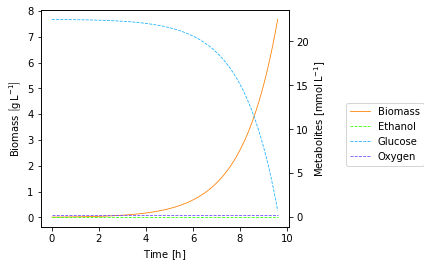

In [104]:
plot_concentrations(concentrations)

##Adding lactose to substrate

In [105]:
# Defining model
fba_model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [106]:
X = KineticVariable("Biomass")
Gluc = KineticVariable("Glucose")
Lac = KineticVariable("Lactose")
Oxy = KineticVariable("Oxygen")
Eth = KineticVariable("Ethanol")

dfba_model.add_kinetic_variables([X, Gluc, Lac, Oxy, Eth])

In [107]:
mu = ExchangeFlux("BIOMASS_Ec_iML1515_core_75p37M")
v_G = ExchangeFlux("EX_glc__D_e")
v_L = ExchangeFlux("EX_lcts_e")
v_O = ExchangeFlux("EX_o2_e")
v_E = ExchangeFlux("EX_etoh_e")


dfba_model.add_exchange_fluxes([mu, v_G, v_L, v_O, v_E])

In [108]:
dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_G * 180.1559/1000 * X) # v_G [mmol gDW^-1 h^-1] * 0.18 g/mmol * gDW/L
dfba_model.add_rhs_expression("Lactose", v_L * 342.3/1000 * X)
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant
dfba_model.add_rhs_expression("Ethanol", v_E * 46.06844/1000 * X)

In [109]:
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

**glycose is inhibited by ethanol**

In [110]:
vmax_glc = 10.5 # [mmol gDW^-1 h^-1]
Kg = 0.0027 # g/L Glucose Michaelis-Mentent constant
Kie = 20 # g/L Ethanol inhibition constant
dfba_model.add_exchange_flux_lb(
    "EX_glc__D_e",
    vmax_glc * (Gluc / (Kg + Gluc)) * (1 / (1 + Eth / Kie)),
    Gluc
)

**lactose is inhibited by both ethanol and glucose**

In [115]:
vmax_lac = 1.1 # [mmol gDW^-1 h^-1]
Kl = 0.001 # g/L lactose Michaelis-Mentent constant #[Chen et al. 2008]
Kie = 20 # g/L Ethanol inhibition constant
Kig = 0.005 # g/L Glucose inhibition constant
dfba_model.add_exchange_flux_lb(
    "EX_lcts_e",
    vmax_lac * (Lac / (Kl + Lac)) * (1 / (1 + Eth / Kie)) * (1 / (1 + Gluc / Kig)),
    Lac,
)

In [116]:
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "Glucose": 22.5, # (g/L)
        "Lactose": 20.0,   # (g/L)
        "Oxygen": 0.24,  # (mmol/L)
        "Ethanol": 0.0,  # (g/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 25.0, 0.1, ["EX_glc__D_e", "EX_glyc_e", "EX_etoh_e"])

In [117]:
# from dfba.plot.plotly import *
from dfba.plot.matplotlib import *

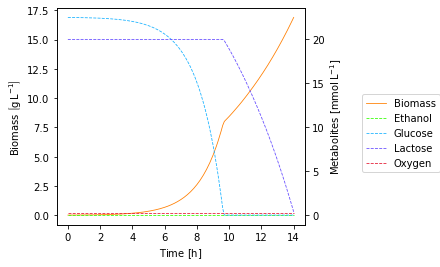

In [118]:
plot_concentrations(concentrations)

In [119]:
from os.path import dirname, join, pardir

from cobra.io import read_sbml_model

from dfba import DfbaModel, ExchangeFlux, KineticVariable

In [120]:
# Defining model
fba_model = read_sbml_model("../data/iML1515_5htp_1st_strategy.xml")
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [121]:
X = KineticVariable("Biomass")
Gluc = KineticVariable("Glucose")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, Gluc, Oxy])

In [122]:
# Exchange fluxes
mu = ExchangeFlux("BIOMASS_Ec_iML1515_core_75p37M")
v_GL = ExchangeFlux("EX_glc__D_e")
v_O = ExchangeFlux("EX_o2_e")


dfba_model.add_exchange_fluxes([mu, v_GL, v_O])

In [123]:
# Rhs expressions
dfba_model.add_rhs_expression("Biomass", mu * X)
dfba_model.add_rhs_expression("Glucose", v_GL * 180.1559/1000 * X) # v_GL [mmol gDW^-1 h^-1] * 0.18 g/mmol * gDW/L
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant


In [124]:
# Adding bounds for oxygen
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

In [125]:
vmax_glc = 10.5 # [mmol gDW^-1 h^-1]
Kg = 0.0027 # g/L Glucose Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_glc__D_e", vmax_glc * (Gluc / (Kg + Gluc)), Gluc)

In [126]:
# add initial conditions and launch simulation
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "Glucose": 22.0, # (g/L)   [Kopp et al. 2018]
        "Oxygen": 0.24,  # (mmol/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 12.0, 0.1, ["EX_glc__D_e"])

In [127]:
# from dfba.plot.plotly import *
from dfba.plot.matplotlib import *

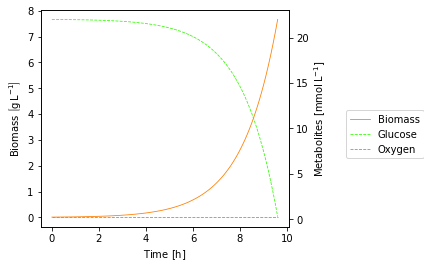

In [128]:
plot_concentrations(concentrations)

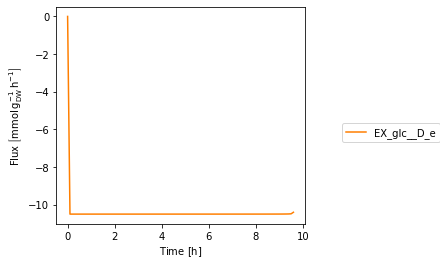

In [129]:
plot_trajectories(trajectories)

**Adding production of 5-HTP**

In [130]:
from cobra.io import read_sbml_model
from cobra.io import write_sbml_model
from cobra import Reaction, Metabolite
import pandas as pd
from os.path import dirname, join, pardir

from cobra.io import read_sbml_model

from dfba import DfbaModel, ExchangeFlux, KineticVariable
from cobra.flux_analysis import flux_variability_analysis
# from dfba.plot.plotly import *
from dfba.plot.matplotlib import *

In [131]:
# Defining model
fba_model = read_sbml_model('../data/iML1515_5htp_1st_strategy.xml')
fba_model.solver = "glpk"
dfba_model = DfbaModel(fba_model)

In [132]:
fba_model.reactions.phhA

Reaction identifier,phhA
Name,
Memory address,0x07f3032bc7460
Stoichiometry,o2_c + thmnp_c + trp__L_c --> hthpth_c + htrp_c O2 O2 + Tetrahydromonapterin + L-Tryptophan --> +
GPR,
Lower bound,0.0
Upper bound,1000.0


In [133]:
# setting the flux of 5htp to the flux at half growth
#fba_model.reactions.phhA.flux = flux_variability_analysis(fba_model, fba_model.reactions.phhA, fraction_of_optimum = 0.5)["maximum"][0]
#print(fba_model.reactions.phhA.flux)

#model.optimize().objective_value
#solution = fba_model.optimize()

In [134]:
X = KineticVariable("Biomass")
HTP = KineticVariable("5HTP")
Gluc = KineticVariable("Glucose")
Oxy = KineticVariable("Oxygen")

dfba_model.add_kinetic_variables([X, HTP, Gluc, Oxy])

In [135]:
# Exchange fluxes
mu_bio = ExchangeFlux("BIOMASS_Ec_iML1515_core_75p37M")
v_htp = ExchangeFlux("EX_htrp")
v_GL = ExchangeFlux("EX_glc__D_e")
v_O = ExchangeFlux("EX_o2_e")


dfba_model.add_exchange_fluxes([mu_bio, v_htp, v_GL, v_O])

In [136]:
# Rhs expressions
dfba_model.add_rhs_expression("Biomass", mu_bio * X)
dfba_model.add_rhs_expression("5HTP", v_htp * 220.23/1000 * X)
dfba_model.add_rhs_expression("Glucose", v_GL * 180.1559/1000 * X) # v_GL [mmol gDW^-1 h^-1] * 0.18 g/mmol * gDW/L
dfba_model.add_rhs_expression("Oxygen", 0) # O2 is kept constant


In [137]:
# Adding bounds for oxygen
vmax_o2 = 15 # [mmol gDW^-1 h^-1]
Ko = 0.024 # mmol/L O2 Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_o2_e", vmax_o2 * (Oxy / (Ko + Oxy)), Oxy)

In [138]:
# Adding bounds for glucose
vmax_glc = 10.5 # [mmol gDW^-1 h^-1]
Kg = 0.0027 # g/L Glucose Michaelis-Mentent constant
dfba_model.add_exchange_flux_lb("EX_glc__D_e", vmax_glc * (Gluc / (Kg + Gluc)), Gluc)

In [139]:
#dfba_model.add_exchange_flux_lb(
#    "EX_htrp", 0, 2 # some fixed value for the bounds of 5htp exchange
#)

In [140]:
# add initial conditions and launch simulation
dfba_model.add_initial_conditions(
    {
        "Biomass": 0.01, # (gDW/L)
        "5HTP": 0.00, # (gDW/L)
        "Glucose": 22.0, # (g/L)   [Kopp et al. 2018]
        "Oxygen": 0.24,  # (mmol/L)
    }
)
concentrations, trajectories = dfba_model.simulate(0.0, 30.0, 0.1, ["EX_glc__D_e","EX_htrp"])

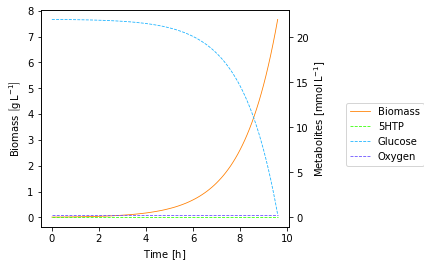

In [141]:
plot_concentrations(concentrations)

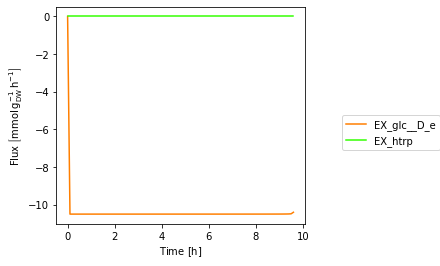

In [142]:
plot_trajectories(trajectories)